# Pandas

[Pandas](https://pandas.pydata.org/) es una librería que incluye estructuras de datos y herramientas de análisis.
Sus principales estructuras de datos son Series y DataFrame.

Pandas dispone de una funcionalidad muy amplia que no podemos cubrir en este tutorial por lo que os recomendamos consultar su excelente [documentación](https://pandas.pydata.org/pandas-docs/stable/tutorials.html).

## Series

[Series](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) es un array unidimensional construido sobre un array de Numpy.
La principal dieferencia entre una Series y un array de Numpy se debe a que la primera incluye un índice que podemos utilizar para etiquetar los elementos de la serie.


In [1]:
import pandas

s = pandas.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s['b']

2

Series tiene un comportamiento muy similar al de un array de Numpy por lo que puede utilizarse en la mayoría de funciones que esperan un array.

In [2]:
import numpy

numpy.max(s)

4

Se puede acceder al array de Numpy que almacena los datos utilizando la propiedad values.

In [55]:
s.values

array([1, 2, 3, 4])

![pandas vs numpy](../imagenes/numpy_vs_pandas.png)

## DataFrame

[DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) es una tabla bidimensional con etiquetas.
Cuando creamos un DataFrame, además de los datos, podemos especificar el índice para las filas y los nombres de las columnas.

En un DataFrame puede tener tipos heterogéneos, cada columna se comporta como una serie y puede albergar columnas de distintos tipos.


Se puede pensar en un DataFrame como en un diccionario cuyos valores son series.

In [4]:
df = pandas.DataFrame([[1, 2.1], [3, 4.0], [5, 6.2]], ['A', 'B', 'C'], ['col1', 'col2'])
df

,col1,col2
A,1,2.1
B,3,4.0
C,5,6.2


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, A to C
Data columns (total 2 columns):
col1    3 non-null int64
col2    3 non-null float64
dtypes: float64(1), int64(1)
memory usage: 72.0+ bytes


In [5]:
df['col1']

A    1
B    3
C    5
Name: col1, dtype: int64

In [6]:
df['col2']

A    2.1
B    4.0
C    6.2
Name: col2, dtype: float64

Pandas tiene otro tipo de dato para trabajar con matrices multidimensionales: [Panel](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Panel.html).

## Leyendo datos

Pandas tiene un gran soporte para leer datos desde múltiples fuentes.

Podemos leer datos desde ficheros tabulares [CSV](https://es.wikipedia.org/wiki/Valores_separados_por_comas).

In [26]:
iris = pandas.read_csv('../datos/iris.data', index_col='planta')
iris.iloc[:5, :]

,largo_sepalo,ancho_sepalo,largo_petalo,ancho_petalo,especie
planta,,,,,
planta1,5.1,3.5,1.4,0.2,Iris-setosa
planta2,4.9,3.0,1.4,0.2,Iris-setosa
planta3,4.7,3.2,1.3,0.2,Iris-setosa
planta4,4.6,3.1,1.5,0.2,Iris-setosa
planta5,5.0,3.6,1.4,0.2,Iris-setosa


## Seleccionando columnas y filas

### Columnas

Podemos referirnos a una columna concreta por su nombre y obtendremos la serie correspondiente.

In [32]:
iris['largo_sepalo'][:5]

planta
planta1    5.1
planta2    4.9
planta3    4.7
planta4    4.6
planta5    5.0
Name: largo_sepalo, dtype: float64

También podemos pedir una lista de columnas.

In [33]:
iris[['ancho_sepalo', 'largo_sepalo']][:5]

,ancho_sepalo,largo_sepalo
planta,,
planta1,3.5,5.1
planta2,3.0,4.9
planta3,3.2,4.7
planta4,3.1,4.6
planta5,3.6,5.0


### Indexando por posición o por índice: loc e iloc

Dado que las tablas de pandas tienen etiquetas en filas (index) y columnas (nombres de las columnas) podemos utilizar estas etiquetas para obtener datos, pero si lo deseamos también podemos indexar basándonos en las posiciones de las filas y las columnas.

Una forma clara de distinguir ambos indexados es utilizar [iloc](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html) y [loc](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html).
loc espera etiquetas de índices de filas y columnas y loc espera posiciones.
Hay que tener en cuenta de que loc e iloc esperan primero el índice para la fila y luego el de la columna.

In [39]:
iris.iloc[0]

largo_sepalo            5.1
ancho_sepalo            3.5
largo_petalo            1.4
ancho_petalo            0.2
especie         Iris-setosa
Name: planta1, dtype: object

In [41]:
iris.iloc[:5, 0]

planta
planta1    5.1
planta2    4.9
planta3    4.7
planta4    4.6
planta5    5.0
Name: largo_sepalo, dtype: float64

In [43]:
iris.loc['planta1']

largo_sepalo            5.1
ancho_sepalo            3.5
largo_petalo            1.4
ancho_petalo            0.2
especie         Iris-setosa
Name: planta1, dtype: object

### Seleccionando mediante máscaras

De forma análoga a como lo hacíamos en Numpy en Pandas también podemos crear máscaras binarias y utilizarlas para indexar.

In [53]:
mascara = iris['ancho_sepalo'] >= 3.9
iris[mascara]

,largo_sepalo,ancho_sepalo,largo_petalo,ancho_petalo,especie
planta,,,,,
planta6,5.4,3.9,1.7,0.4,Iris-setosa
planta15,5.8,4.0,1.2,0.2,Iris-setosa
planta16,5.7,4.4,1.5,0.4,Iris-setosa
planta17,5.4,3.9,1.3,0.4,Iris-setosa
planta33,5.2,4.1,1.5,0.1,Iris-setosa
planta34,5.5,4.2,1.4,0.2,Iris-setosa


## Tablas dinámicas, agrupando filas

Podemos agrupar filas y obtener estadísticas basándolse en el valor de una fila concreta utilizando el método [groupby](http://pandas.pydata.org/pandas-docs/stable/groupby.html).

In [58]:
iris.groupby('especie').describe()

ancho_petalo  ancho_sepalo  largo_petalo  largo_sepalo
especie                                                                      
Iris-setosa     count     50.000000     50.000000     50.000000     50.000000
                mean       0.244000      3.418000      1.464000      5.006000
                std        0.107210      0.381024      0.173511      0.352490
                min        0.100000      2.300000      1.000000      4.300000
                25%        0.200000      3.125000      1.400000      4.800000
                50%        0.200000      3.400000      1.500000      5.000000
                75%        0.300000      3.675000      1.575000      5.200000
                max        0.600000      4.400000      1.900000      5.800000
Iris-versicolor count     50.000000     50.000000     50.000000     50.000000
                mean       1.326000      2.770000      4.260000      5.936000
                std        0.197753      0.313798      0.469911      0.516171
                min        1.000000      2.000000      3.000000      4.900000
                25%        1.200000      2.525000      4.000000      5.600000
                50%        1.300000      2.800000      4.350000      5.900000
                75%        1.500000      3.000000      4.600000      6.300000
                max        1.800000      3.400000      5.100000      7.000000
Iris-virginica  count     50.000000     50.000000     50.000000     50.000000
                mean       2.026000      2.974000      5.552000      6.588000
                std        0.274650      0.322497      0.551895      0.635880
                min        1.400000      2.200000      4.500000      4.900000
                25%        1.800000      2.800000      5.100000      6.225000
                50%        2.000000      3.000000      5.550000      6.500000
                75%        2.300000      3.175000      5.875000      6.900000
                max        2.500000      3.800000      6.900000      7.900000

Podemos aplicar funciones a estos agregados, por ejemplo, podemos pedir que haga la media de los valores por especie.

In [64]:
iris.groupby('especie').aggregate(numpy.mean)

,largo_sepalo,ancho_sepalo,largo_petalo,ancho_petalo
especie,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


## Gráficos

Pandas permite hacer una exploración gráfica de los datos de un modo muy sencillo.

Podemos dibujar los valores de una columa.

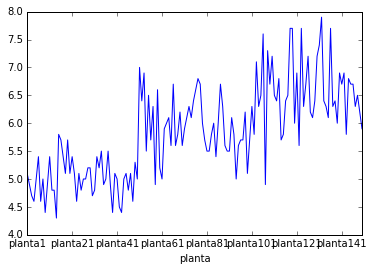

In [67]:
%matplotlib inline

iris['largo_sepalo'].plot()

También podemos hacer un histograma.

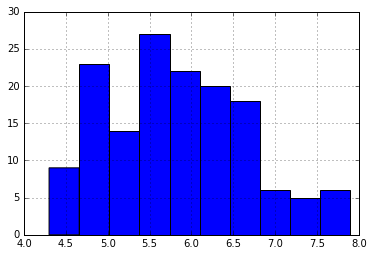

In [68]:
iris['largo_sepalo'].hist()

Utilizando los agregados podemos hacer los histogramas por especie.

especie
Iris-setosa        Axes(0.125,0.125;0.775x0.775)
Iris-versicolor    Axes(0.125,0.125;0.775x0.775)
Iris-virginica     Axes(0.125,0.125;0.775x0.775)
Name: largo_sepalo, dtype: object

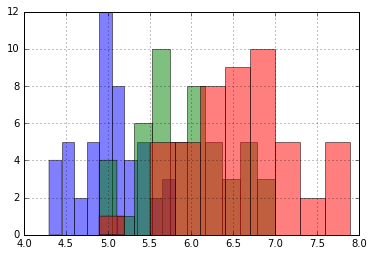

In [72]:
iris.groupby('especie')['largo_sepalo'].hist(alpha=0.5)